# Data Exploration

CROP RECOMMENDATION SYSTEM:

Crop recommendation data is used in this notebook.The data in the dataset is made by merging several publicly available datasets from India.Features in this dataset are pre-computed.

GOAL:
This recommendation system helps farmers in making informed decisions for cultivating the optimum crops based on several parameters.

MACHINE LEARNING PROBLEM:
Based on the soil type and weather, machine learning model can be built and used to recommend the appropriate crops to grow.

METRICS:
Accuracy, Precision, Recall, confusion matrix

# Model Requirements

1. Crop type
2. Soil type:
   1. ph values
   2. Nitrogen, Phosphorus, potassium ratio
3. weather:
   1. temperature
   2. humidity
   3. rainfall

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
from sklearn import tree
import os
working_directory=os.getcwd()
print(working_directory)

/Users/yochitharishitha/Downloads/lab01


# Dataset

In [2]:
#Load the dataset
path=working_directory + '/dataset/Crop_recommendation.csv'
#Read the csv file as dataframe
crop_df=pd.read_csv(path)

In [3]:
#Display some records
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop_df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop_df.shape

(2200, 8)

# Data Statistics

In [7]:
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
crop_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Data Description

1. N : ratio of Nitrogen content in soil
2. P : ratio of Phosphorous content in soil
3. K : ratio of Potassium content in soil
4. temperature : temperature in degree Celsius
5. humidity : relative humidity in %
6. ph : ph value of the soil
7. rainfall : rainfall in mm

# Data Visualization

In [9]:
labels_count=crop_df['label'].unique()
crop_df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

OBSERVATION : The dataset is balanced

<AxesSubplot:xlabel='rainfall', ylabel='Count'>

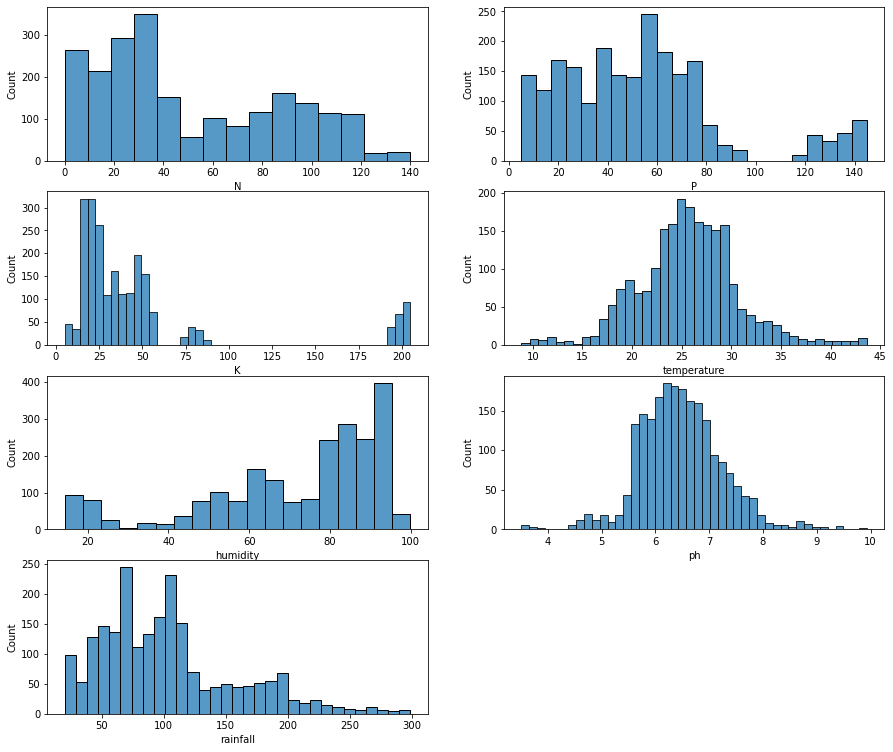

In [10]:
plt.figure(figsize=(15,13))
plt.subplot(4,2,1)
sns.histplot(crop_df['N'])
plt.subplot(4,2,2)
sns.histplot(crop_df['P'])
plt.subplot(4,2,3)
sns.histplot(crop_df['K'])
plt.subplot(4,2,4)
sns.histplot(crop_df['temperature'])
plt.subplot(4,2,5)
sns.histplot(crop_df['humidity'])
plt.subplot(4,2,6)
sns.histplot(crop_df['ph'])
plt.subplot(4,2,7)
sns.histplot(crop_df['rainfall'])

Text(0.5, 1.0, 'N vs Crop Type')

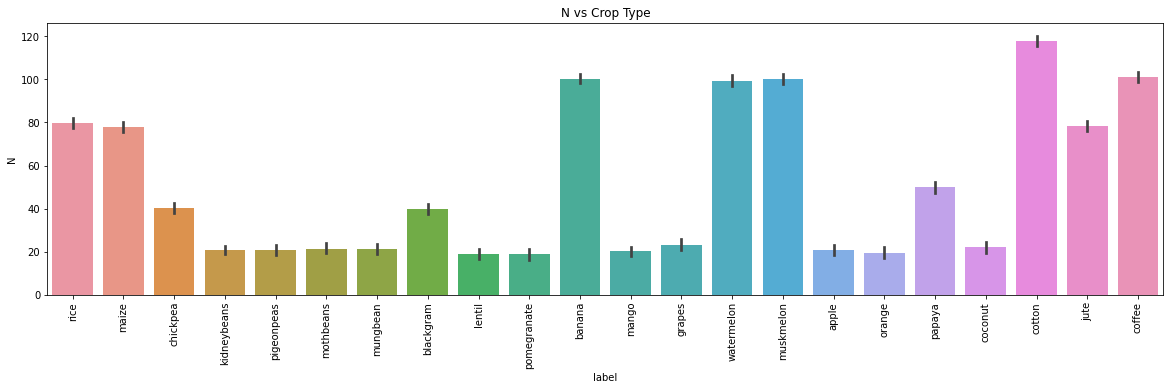

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x = "label", y = crop_df['N'], data = crop_df)
plt.xticks(rotation=90)
plt.title("N vs Crop Type")

OBSERVARTION:
1. Crops which requires high ratio of Nitrogen in soil: cotton
2. Crops which requires low ratio of Nitrogen in soil: Kidneybeans,pigeonpeas, mothbeans, mungbean,lentil,pomegranate

Text(0.5, 1.0, 'P vs Crop Type')

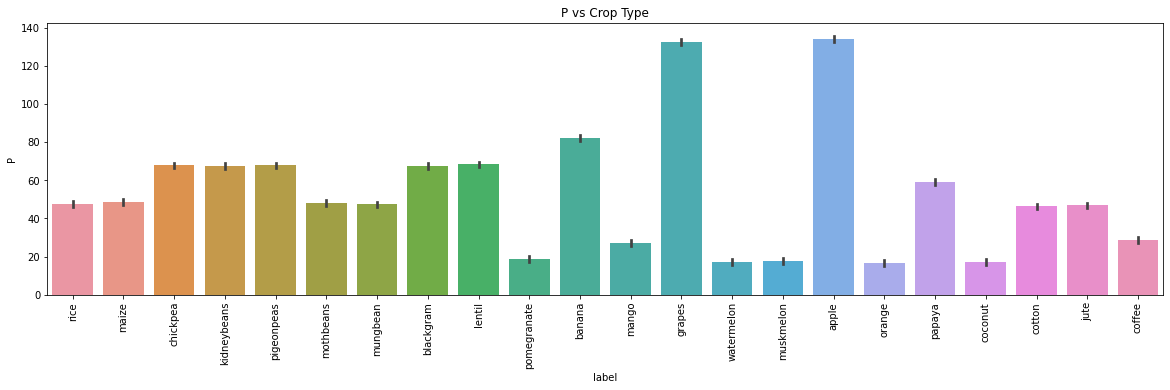

In [12]:
plt.figure(figsize=(20,5))
sns.barplot(x = "label", y = crop_df['P'], data = crop_df)
plt.xticks(rotation=90)
plt.title("P vs Crop Type")

OBSERVATION:
1. Crops which requires high ratio of Phosphorous in soil: grapes, apple
2. Crops which requires low ratio of Phosphorous in soil: pomegranate, watermelon, muskmelon, orange, coconut

Text(0.5, 1.0, 'K vs Crop Type')

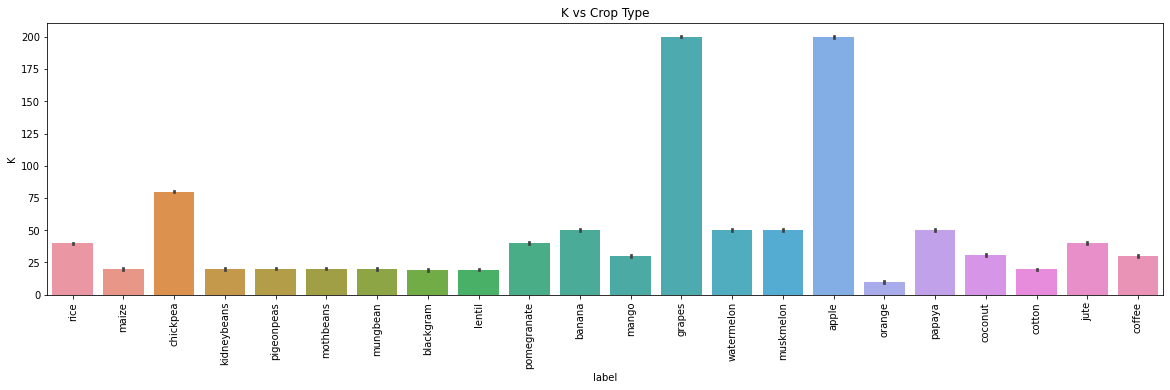

In [13]:
plt.figure(figsize=(20,5))
sns.barplot(x = "label", y = crop_df['K'], data = crop_df)
plt.xticks(rotation=90)
plt.title("K vs Crop Type")

OBSERVATION:
1. Crops which requires high ratio of Potassium in soil: grapes, apple
2. Crops which requires low ratio of Potassium in soil: orange

Text(0.5, 1.0, 'temperature vs Crop Type')

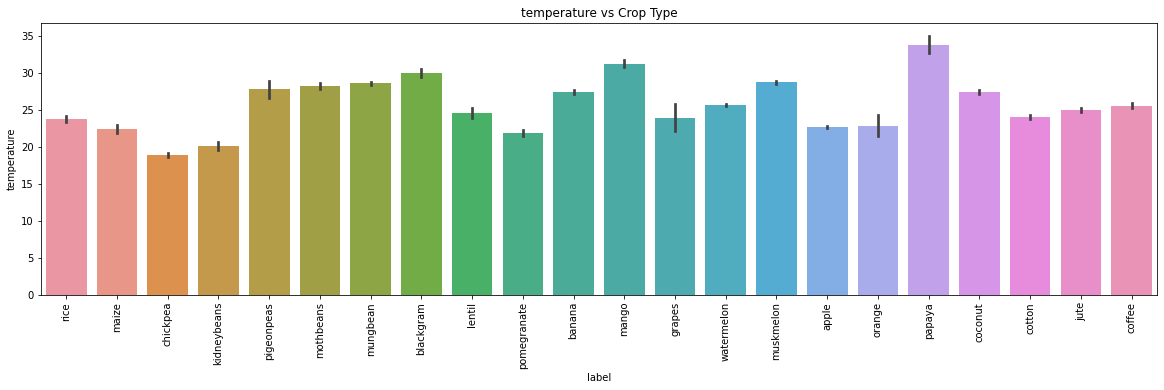

In [14]:
plt.figure(figsize=(20,5))
sns.barplot(x = "label", y = crop_df['temperature'], data = crop_df)
plt.xticks(rotation=90)
plt.title("temperature vs Crop Type")

OBSERVATION:
1. Crops which requires low Temperature: chickpea
2. Crops which requires high Temperature: papaya

Text(0.5, 1.0, 'humidity vs Crop Type')

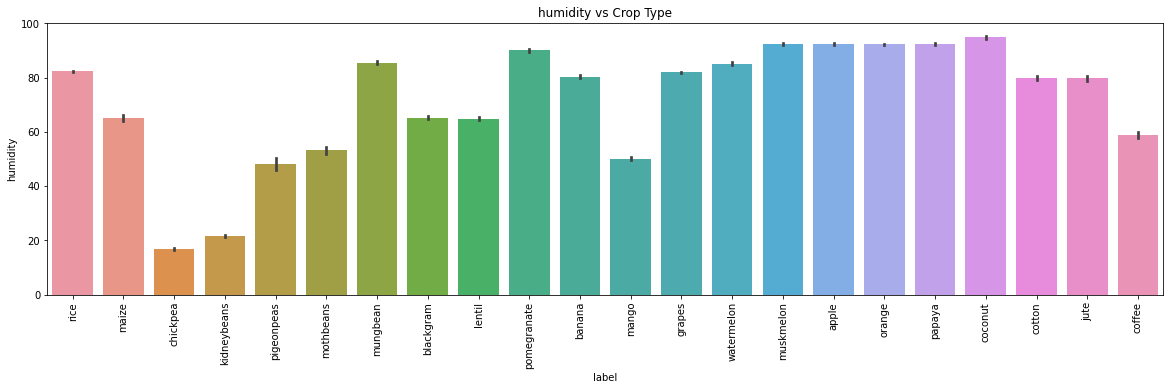

In [15]:
plt.figure(figsize=(20,5))
sns.barplot(x = "label", y = crop_df['humidity'], data = crop_df)
plt.xticks(rotation=90)
plt.title("humidity vs Crop Type")

OBSERVATION:
1. Crops which requires low Humidity: chickpea
2. Crops which requires high Humidity: coconut

Text(0.5, 1.0, 'ph vs Crop Type')

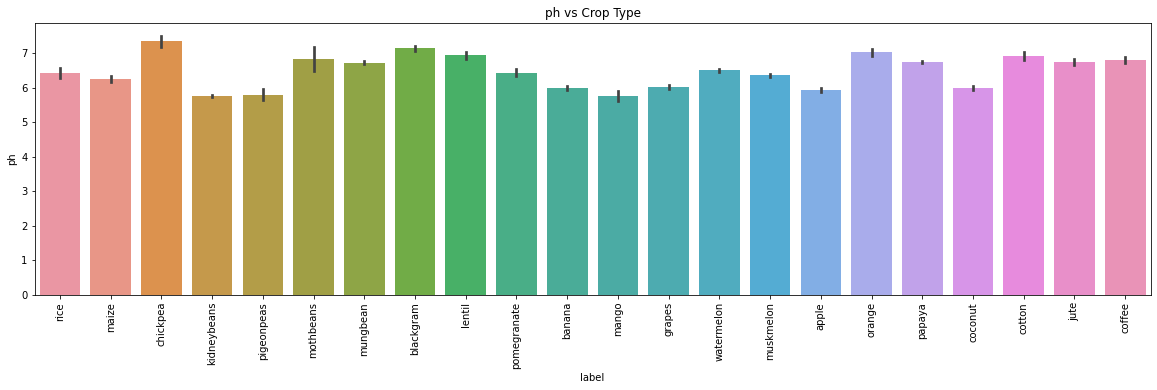

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x = "label", y = crop_df['ph'], data = crop_df)
plt.xticks(rotation=90)
plt.title("ph vs Crop Type")

OBSERVATION:
1. Crops which requires low ph: chickpea
2. Crops which requires high ph: kidneybeans, pigeonpeas, mango, apple, coconut

Text(0.5, 1.0, 'Rainfall vs Crop Type')

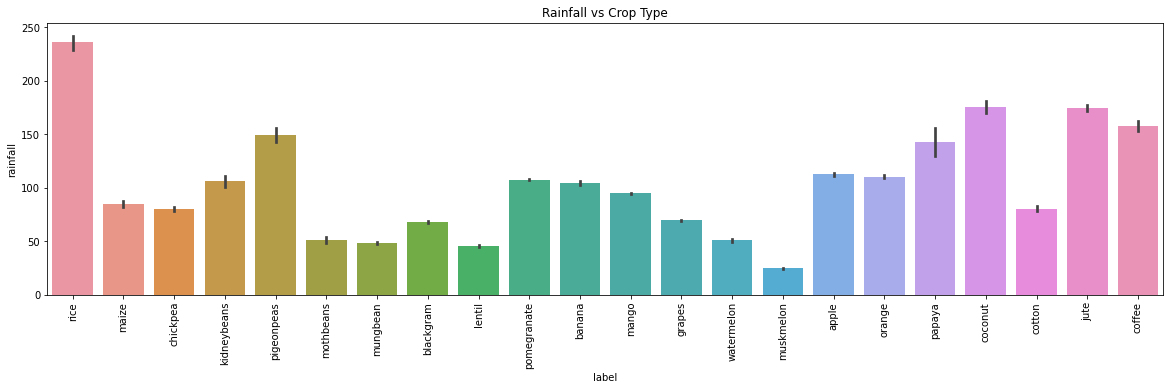

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(x = "label", y = crop_df['rainfall'], data = crop_df)
plt.xticks(rotation=90)
plt.title("Rainfall vs Crop Type")

OBSERVATION:
1. Crops which requires low rainfall: muskmelon
2. Crops which requires high rainfall: rice

<Figure size 1440x1440 with 0 Axes>

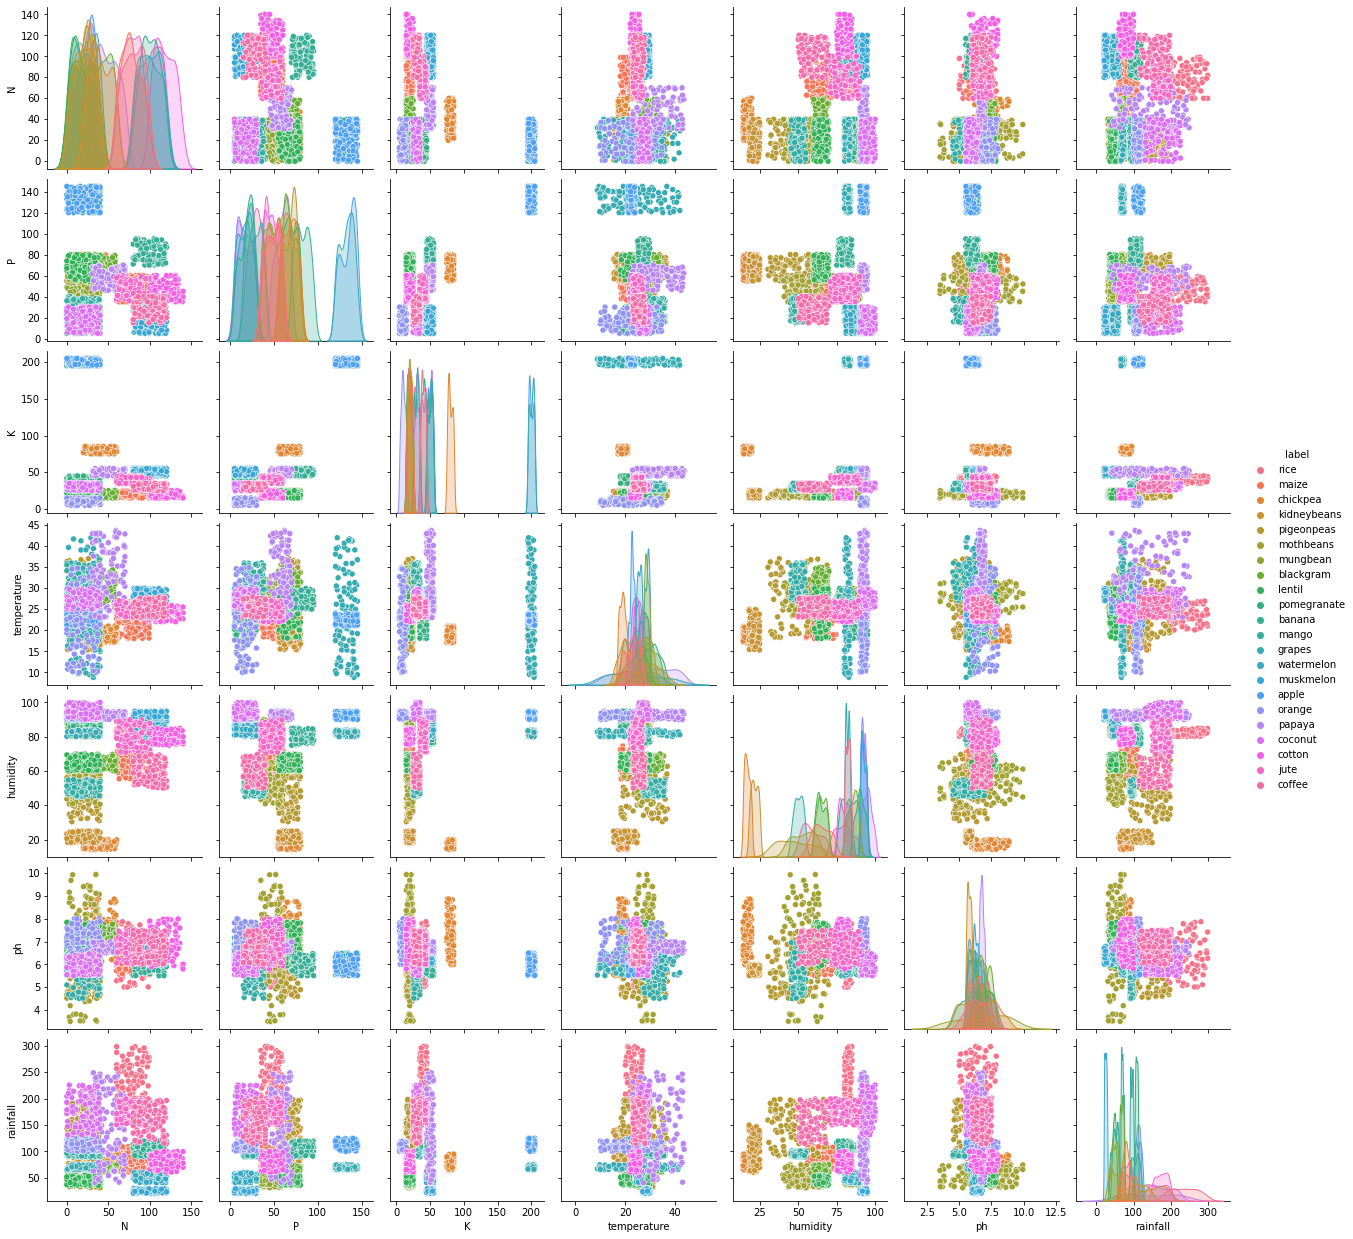

In [18]:
plt.figure(figsize=(20,20))
sns.pairplot(crop_df, hue = "label")

In [19]:
#Crops grown in summer, winter and rainy season
print("Summer Crops")
print(crop_df[(crop_df['temperature'] > 30) & (crop_df['humidity'] > 50)]['label'].unique())
print("Winter Crops")
print(crop_df[(crop_df['temperature'] < 20) & (crop_df['humidity'] > 30)]['label'].unique())
print("Rainy Crops")
print(crop_df[(crop_df['rainfall'] > 200) & (crop_df['humidity'] > 50)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops
['rice' 'papaya' 'coconut']


<AxesSubplot:xlabel='label', ylabel='N'>

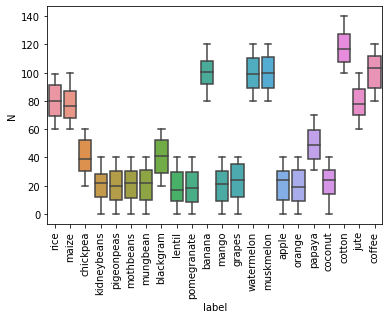

In [20]:
plt.xticks(rotation=90)
sns.boxplot(x= 'label',y='N' ,data=crop_df)

<AxesSubplot:xlabel='label', ylabel='K'>

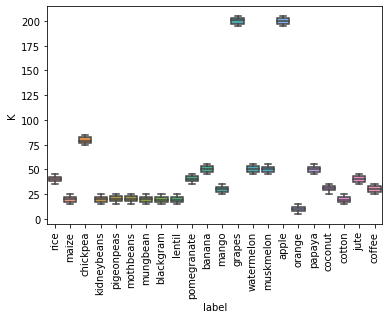

In [21]:
plt.xticks(rotation=90)
sns.boxplot(x='label',y='K',data=crop_df)

<AxesSubplot:xlabel='label', ylabel='P'>

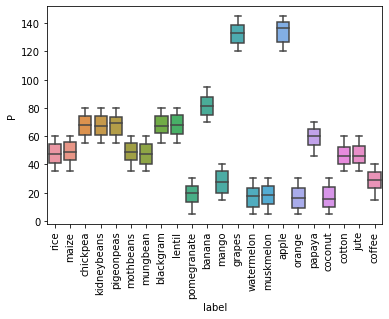

In [22]:
plt.xticks(rotation=90)
sns.boxplot(x= 'label',y='P' ,data=crop_df)

<AxesSubplot:xlabel='label', ylabel='temperature'>

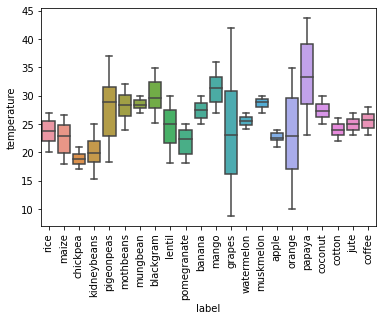

In [23]:
plt.xticks(rotation=90)
sns.boxplot(x= 'label',y='temperature' ,data=crop_df)

<AxesSubplot:xlabel='label', ylabel='humidity'>

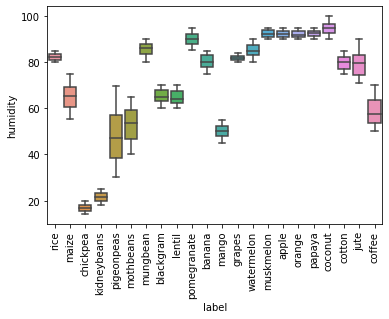

In [24]:
plt.xticks(rotation=90)
sns.boxplot(x= 'label',y='humidity' ,data=crop_df)

<AxesSubplot:xlabel='label', ylabel='ph'>

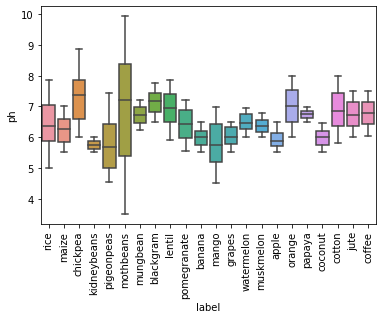

In [25]:
plt.xticks(rotation=90)
sns.boxplot(x= 'label',y='ph' ,data=crop_df)

<AxesSubplot:xlabel='label', ylabel='rainfall'>

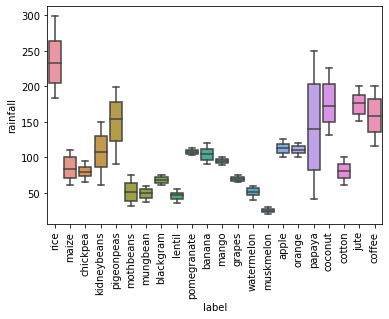

In [26]:
plt.xticks(rotation=90)
sns.boxplot(x= 'label',y='rainfall' ,data=crop_df)

OBSERVATION: From the barplots, we can conclude that there are no outliers in the dataset.

# Data Cleaning

MISSING VALUES:
There are no null and missing values in the dataset. 

In [27]:
crop_df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [28]:
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

CORRELATION MATRIX:

<AxesSubplot:>

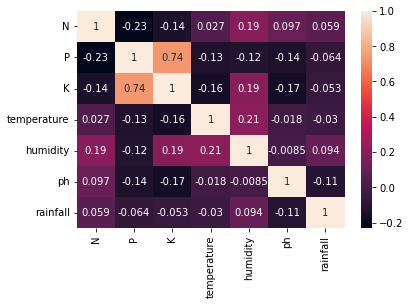

In [29]:
sns.heatmap(crop_df.corr(),annot=True)

OBSERVATION:
1. features P and K has high correlation values(0.74)
2. features N and K has low correlation values(-0.23)

We can't drop any of the features because the dataset requires NPK ratio values.

# Data Labelling

This dataset doesn't need any data labelling.


# Feature Engineering

LABEL ENCODING:
We will be using LabelEncoder( ) to convert categorical data into numerical data. 

In [30]:
tot_columns=crop_df.columns[:-1]
label_encoder = LabelEncoder()
x = crop_df[tot_columns]
y = label_encoder.fit_transform(crop_df["label"])
print(x.shape, y.shape)

(2200, 7) (2200,)


In [31]:
labeldict = {}
for i in range(22):
    labeldict[i] = label_encoder.inverse_transform([i])[0]
labeldict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

Split into Train and Test set:

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y, test_size = 0.2, random_state = 2)
print(f"Train Data: {x_train.shape}, {y_train.shape}")
print(f"Test Data: {x_test.shape}, {y_test.shape}")

Train Data: (1760, 7), (1760,)
Test Data: (440, 7), (440,)


# Building a Model 
Let's try Decision tree and Random forest classifiers.

# Decision Tree

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.74      0.93      0.83        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00   

<AxesSubplot:>

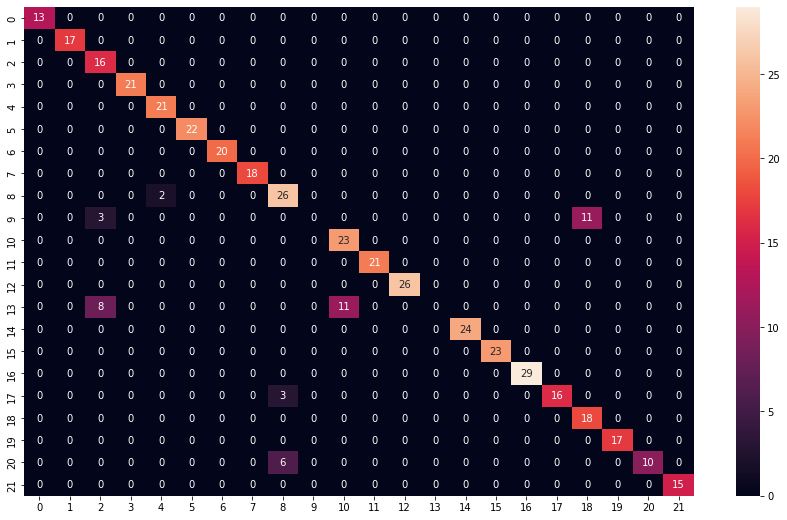

In [33]:
Dec_Tree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

Dec_Tree.fit(x_train,y_train)

# Accuracy on Test Data
dec_predicted_values = Dec_Tree.predict(x_test)
dec_met= metrics.accuracy_score(y_test, dec_predicted_values)
print("DecisionTrees's Accuracy is: ", dec_met*100)
print(classification_report(y_test,dec_predicted_values))
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test,dec_predicted_values), annot = True)

OBSERVATION:
1. Reading across the rows 9 and 13,all the predicted values are false positives.
2. Reading down the columns 2,5,8,10 and 19;predicted values are false negatives.

In [34]:
test_data1 = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction1 = Dec_Tree.predict(test_data1)
print(prediction1)

[5]


In [35]:
test_data2 = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction2 = Dec_Tree.predict(test_data2)
print(prediction2)

[8]


In [36]:
#define a grid of hyperparameter values
from sklearn.model_selection import (
    BaseCrossValidator, GridSearchCV, StratifiedKFold, train_test_split)
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators': [200, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,6],
    'criterion' :['gini', 'entropy'],
    'random_state' : [42]
}
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(),
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = StratifiedKFold(n_splits=5), 
                               verbose=2, 
                               random_state=42,
                               n_jobs = -1)
rf_random.fit(x_train,y_train)
rf_random.cv_results_
rf_random.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'random_state': 42,
 'n_estimators': 400,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'entropy'}

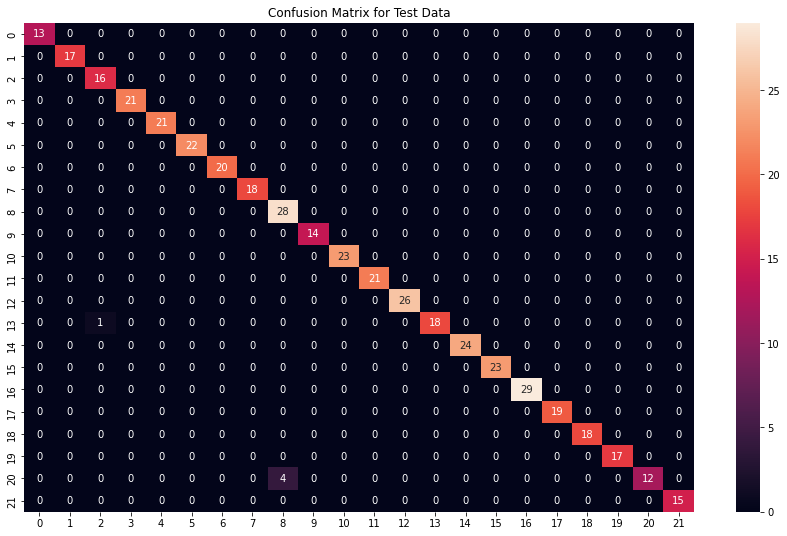

RF's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00

In [37]:
#Initialize the classifier with the best parameters
rf = RandomForestClassifier(n_estimators = 400, 
                            max_depth = 6, 
                            max_features = 'sqrt', 
                            random_state = 42, 
                            criterion = 'entropy').fit(x_train, y_train)

#predict and print confusion matrix
rf_pred = rf.predict(x_test)
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
RF_acc= metrics.accuracy_score(y_test, rf_pred)
print("RF's Accuracy is: ", RF_acc)
print(sklearn.metrics.classification_report(y_test, rf_pred))

OBSERVATION:
Comparetively, false positives and false negatives are less.

# Random Forest Classifier

Accuracy on Test Data: 98.86363636363636%


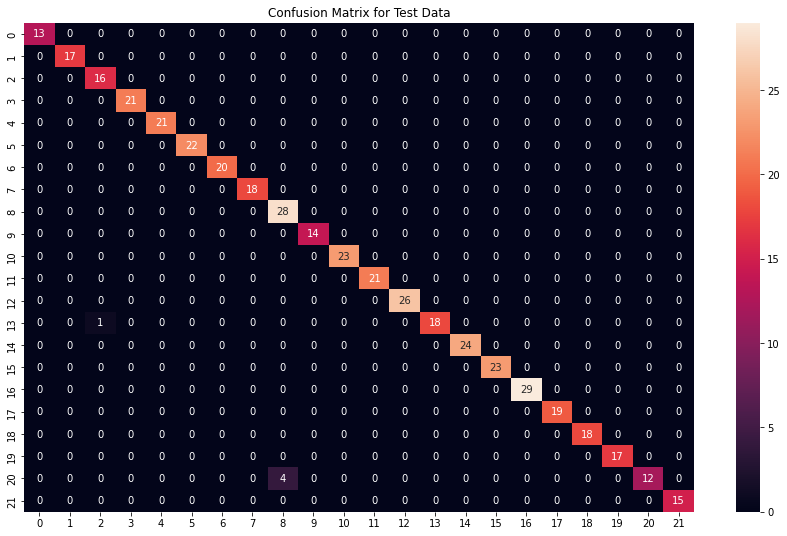

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

In [38]:
rf_pipeline = make_pipeline(StandardScaler(), 
                            RandomForestClassifier(n_estimators = 400, 
                            max_depth = 6, 
                            max_features = 'sqrt', 
                            random_state = 42, 
                            criterion = 'entropy'))
rf_pipeline.fit(x_train, y_train)

# Accuracy on Test Data
rf_predictions = rf_pipeline.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy on Test Data: {rf_accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test,rf_predictions))

OBSERVATION:
In column 8,only 2 values have been classified as rice instead of jute which are false negatives.

In [39]:
prediction4 = rf_pipeline.predict(test_data2)
print(prediction4)

[8]


OBSERVATION:
Random Forest classifier acquired highest accuracy. After applying feature engineering techniques, KNN and Random Forest classifiers performed well compared to decision tree. From the classification report,
1. Decision Tree:Accuracy(90)
   - Jute: Precision:0.74, Recall:0.93, f1score:0.83
2. KNN:Accuracy(97.04) 
   - Jute: Precision:0.87, Recall:0.96, f1score:0.92
3. Random Forest: Accuracy(99.54)
   - Jute: Precision: 0.93, Recall:1.00, f1score:0.97

In [40]:
#install MLFlow
!pip install mlflow

In [41]:
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download artifacts from an MLflow...
  azureml      Serve models on Azure ML.
  db           Commands for managing an MLflow tracking database.
  deployments  Deploy MLflow models to custom targets.
  experiments  Manage experiments.
  gc           Permanently delete runs in the `deleted` lifecycle stage.
  models       Deploy MLflow models locally.
  run          Run an MLflow project from the given URI.
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.
  ui           Launch the MLflow tracking UI for local viewing of run...


In [42]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("AI_assign")

<Experiment: artifact_location='./mlruns/2', experiment_id='2', lifecycle_stage='active', name='AI_assign', tags={}>

In [43]:
def train_model(n_estimators,max_depth):
    
    with mlflow.start_run():
  
        rf_pipeline = make_pipeline(StandardScaler(), 
                            RandomForestClassifier(n_estimators = n_estimators, 
                            max_depth = max_depth, 
                            max_features = 'sqrt', 
                            random_state = 42, 
                            criterion = 'entropy'))
        rf_pipeline.fit(x_train, y_train)
        # Accuracy on Test Data
        rf_predictions = rf_pipeline.predict(x_test)
        rf_accuracy = accuracy_score(y_test, rf_predictions)
        print(f"Accuracy on Test Data: {rf_accuracy*100}%")
        print(classification_report(y_test,rf_predictions))
    
        mlparams={ "n_estimators":n_estimators,"max_depth": max_depth}
        mlflow.log_params(mlparams)
        mlmetrics = {"accuracy": rf_accuracy}
        mlflow.log_metrics(mlmetrics)
    
        mlflow.sklearn.log_model(rf_pipeline,"model")

In [44]:
train_model(500,10)

Accuracy on Test Data: 99.54545454545455%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [45]:
train_model(350,12)

Accuracy on Test Data: 99.54545454545455%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [46]:
train_model(250,3)

Accuracy on Test Data: 91.81818181818183%
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.94      1.00      0.97        17
           2       0.80      1.00      0.89        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       1.00      0.14      0.25        28
           9       1.00      1.00      1.00        14
          10       0.96      0.96      0.96        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.79      0.88        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       0.97      1.00      

In [191]:
import dvc.api

In [192]:
path='dataset/Crop_recommendation.csv'
repo='/Users/yochitharishitha/Final_test'
version="final_version1"

In [193]:
data_url_v1=dvc.api.get_url(path=path,
                        repo=repo,
                        rev=version)

In [195]:
data_version1=pd.read_csv(data_url)

In [198]:
tot_columns=data_version1.columns[:-1]
label_encoder = LabelEncoder()
x_v1 = data_version1[tot_columns]
y_v1 = label_encoder.fit_transform(data_version1["label"])
print(x_v1.shape, y_v1.shape)

(2200, 7) (2200,)


In [199]:
x_train_v1, x_test_v1, y_train_v1, y_test_v1 = train_test_split(x_v1.values, y_v1, test_size = 0.2, random_state = 2)
print(f"Train Data: {x_train_v1.shape}, {y_train_v1.shape}")
print(f"Test Data: {x_test_v1.shape}, {y_test_v1.shape}")

Train Data: (1760, 7), (1760,)
Test Data: (440, 7), (440,)


In [201]:
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("DVC_version_1")

2022/06/11 22:08:44 INFO mlflow.tracking.fluent: Experiment with name 'DVC_version_1' does not exist. Creating a new experiment.


<Experiment: artifact_location='./mlruns/4', experiment_id='4', lifecycle_stage='active', name='DVC_version_1', tags={}>

In [202]:
def train_model_v1(n_estimators,max_depth):
    
    with mlflow.start_run():
  
        rf_pipeline_v1 = make_pipeline(StandardScaler(), 
                            RandomForestClassifier(n_estimators = n_estimators, 
                            max_depth = max_depth, 
                            max_features = 'sqrt', 
                            random_state = 42, 
                            criterion = 'entropy'))
        rf_pipeline_v1.fit(x_train_v1, y_train_v1)
        # Accuracy on Test Data
        rf_predictions_v1 = rf_pipeline_v1.predict(x_test_v1)
        rf_accuracy_v1 = accuracy_score(y_test_v1, rf_predictions_v1)
        print(f"Accuracy on Test Data: {rf_accuracy_v1*100}%")
        print(classification_report(y_test_v1,rf_predictions_v1))
    
        mlparams={ "n_estimators":n_estimators,"max_depth": max_depth}
        mlflow.log_params(mlparams)
        mlmetrics = {"accuracy": rf_accuracy_v1}
        mlflow.log_metrics(mlmetrics)
    
        mlflow.sklearn.log_model(rf_pipeline_v1,"model_v1")

In [203]:
train_model_v1(500,10)

Accuracy on Test Data: 99.54545454545455%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [204]:
train_model_v1(350,12)

Accuracy on Test Data: 99.54545454545455%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [205]:
train_model_v1(250,3)

Accuracy on Test Data: 91.81818181818183%
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.94      1.00      0.97        17
           2       0.80      1.00      0.89        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       1.00      0.14      0.25        28
           9       1.00      1.00      1.00        14
          10       0.96      0.96      0.96        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.79      0.88        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       0.97      1.00      

In [206]:
path='dataset/Crop_recommendation.csv'
repo='/Users/yochitharishitha/Final_test'
version="final_version2"

In [210]:
data_url=dvc.api.get_url(path=path,
                        repo=repo,
                        rev=version)

In [211]:
data_version2=pd.read_csv(data_url)

In [212]:
tot_columns_v2=data_version2.columns[:-1]
label_encoder = LabelEncoder()
x_v2 = data_version2[tot_columns_v2]
y_v2 = label_encoder.fit_transform(data_version2["label"])
print(x_v2.shape, y_v2.shape)

(2098, 7) (2098,)


In [213]:
x_train_v2, x_test_v2, y_train_v2, y_test_v2 = train_test_split(x_v2.values, y_v2, test_size = 0.2, random_state = 2)
print(f"Train Data: {x_train_v2.shape}, {y_train_v2.shape}")
print(f"Test Data: {x_test_v2.shape}, {y_test_v2.shape}")

Train Data: (1678, 7), (1678,)
Test Data: (420, 7), (420,)


In [214]:
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("DVC_version_2")

2022/06/11 22:19:01 INFO mlflow.tracking.fluent: Experiment with name 'DVC_version_2' does not exist. Creating a new experiment.


<Experiment: artifact_location='./mlruns/5', experiment_id='5', lifecycle_stage='active', name='DVC_version_2', tags={}>

In [215]:
def train_model_v2(n_estimators,max_depth):
    
    with mlflow.start_run():
  
        rf_pipeline_v2 = make_pipeline(StandardScaler(), 
                            RandomForestClassifier(n_estimators = n_estimators, 
                            max_depth = max_depth, 
                            max_features = 'sqrt', 
                            random_state = 42, 
                            criterion = 'entropy'))
        rf_pipeline_v2.fit(x_train_v2, y_train_v2)
        # Accuracy on Test Data
        rf_predictions_v2 = rf_pipeline_v2.predict(x_test_v2)
        rf_accuracy_v2 = accuracy_score(y_test_v2, rf_predictions_v2)
        print(f"Accuracy on Test Data: {rf_accuracy_v2*100}%")
        print(classification_report(y_test_v2,rf_predictions_v2))
    
        mlparams={ "n_estimators":n_estimators,"max_depth": max_depth}
        mlflow.log_params(mlparams)
        mlmetrics = {"accuracy": rf_accuracy_v2}
        mlflow.log_metrics(mlmetrics)
    
        mlflow.sklearn.log_model(rf_pipeline_v2,"model_v2")

In [216]:
train_model_v2(250,3)

Accuracy on Test Data: 94.28571428571428%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        23
           7       1.00      0.22      0.36        27
           8       1.00      1.00      1.00        20
           9       0.90      1.00      0.95        18
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        11
          12       1.00      0.85      0.92        20
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        19
          16       1.00      1.00      

In [217]:
train_model_v2(350,12)

Accuracy on Test Data: 99.28571428571429%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        23
           7       0.90      1.00      0.95        27
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        19
          16       1.00      1.00      

In [218]:
train_model_v2(500,10)

Accuracy on Test Data: 99.04761904761905%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        23
           7       0.87      1.00      0.93        27
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        19
          16       1.00      1.00      